# **Turma de Pós-Graduação de Ciência de Dados**

**Disciplina: Linguagem de Programação Python**

**prof: Sérgio Assunção Monteiro**

# **Aula 06**

#**Importação, Manipulação e Visualização de Dados**

In [1]:
from google.colab import files
arquivo = files.upload()

Saving planilha_exemplo.xlsx to planilha_exemplo.xlsx


In [2]:
nome=list(arquivo.keys())[0]
nome

'planilha_exemplo.xlsx'

**Transformar os dados em um Dataframe**

In [3]:
import io
import pandas as pd
df = pd.read_excel(io.BytesIO(arquivo[nome]))

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df.head()

,Idade,Renda Anual (k$),Pontuação de gastos (1-100),Cluster
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4


In [6]:
ncluster = df['Cluster'].max() + 1
print(ncluster)

5


In [7]:
y = np.zeros(ncluster)
lstGrupo=[]
for i in range(ncluster):
  total = df.loc[df['Cluster'] == i,'Cluster'].count()
  y[i]=total
  lstGrupo.append('C_'+str(i))

In [8]:
lstGrupo

['C_0', 'C_1', 'C_2', 'C_3', 'C_4']

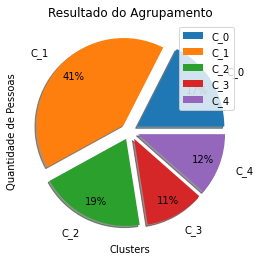

In [9]:
explosao = [0.1, 0.1, 0.1, 0.1, 0.1]
plt.title('Resultado do Agrupamento')
plt.xlabel('Clusters')
plt.ylabel('Quantidade de Pessoas')
plt.pie(y, labels=lstGrupo,
        autopct='%1.0f%%',
        pctdistance=0.8,
        labeldistance=1.2,
        shadow=True,
        explode=explosao)

plt.legend(labels=lstGrupo,
           loc="best")
plt.show()

**Gráfico de barra com Dataframe**

In [10]:
import numpy as np
import pandas as pd

In [11]:
dados = np.random.rand(10, 4)
df = pd.DataFrame(dados, 
                  columns=('coluna_1', 'coluna_2', 'coluna_3', 'coluna_4'))

In [12]:
df.head()

,coluna_1,coluna_2,coluna_3,coluna_4
0,0.519845,0.799045,0.598666,0.946039
1,0.416048,0.410530,0.194199,0.900220
2,0.374183,0.745390,0.812219,0.212210
3,0.274557,0.952946,0.193796,0.212393
4,0.355985,0.184283,0.771151,0.422163


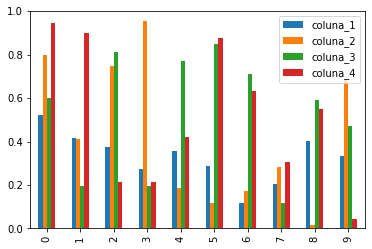

In [13]:
df.plot(kind= 'bar')

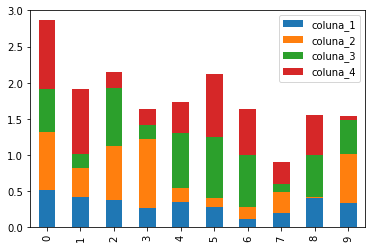

In [14]:
df.plot.bar(stacked=True)

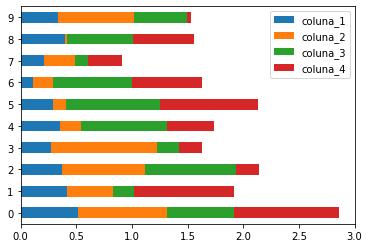

In [15]:
df.plot.barh(stacked=True)

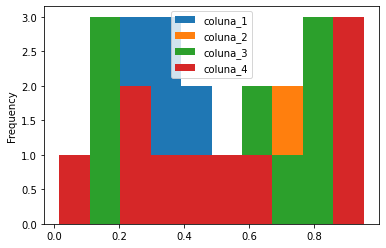

In [16]:
df.plot.hist()

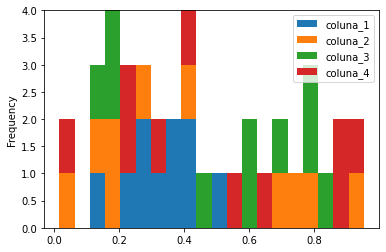

In [17]:
df.plot.hist(stacked=True, bins=20)

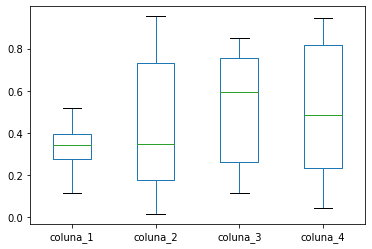

In [18]:
df.plot.box()

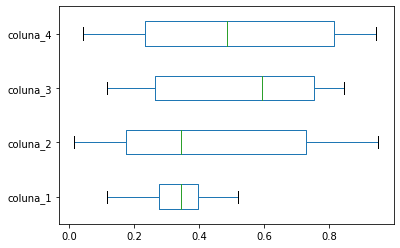

In [19]:
df.plot.box(vert=False, positions=[1, 2, 3, 4])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe65819b410>,
      dtype=object)

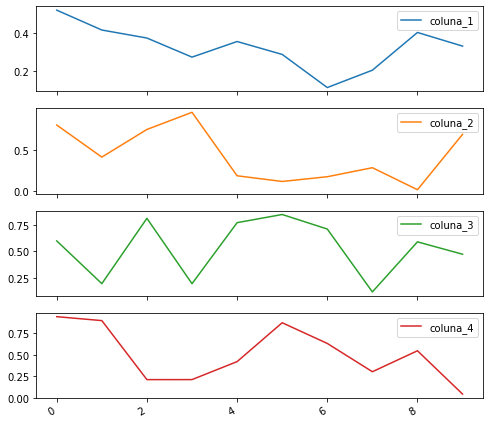

In [20]:
df.plot(subplots=True, figsize=(8, 8))

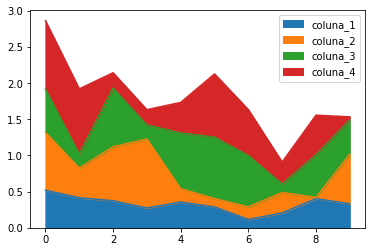

In [21]:
df.plot.area()

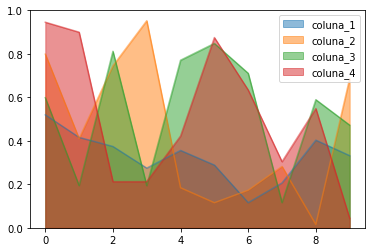

In [22]:
df.plot.area(stacked=False)

**Seaborn**

url: https://seaborn.pydata.org/


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")


In [24]:
df = pd.DataFrame(dict(tempo=np.arange(500),
                       valor=np.random.randn(500).cumsum()))


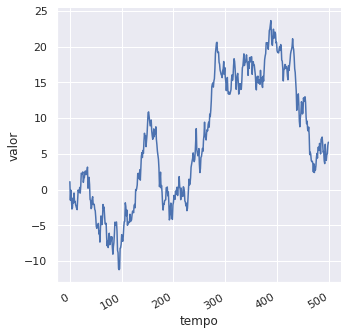

In [25]:
g = sns.relplot(x="tempo", 
                y="valor", 
                kind="line", 
                data=df)

g.figure.autofmt_xdate()

In [26]:
df = pd.DataFrame(dict(tempo=pd.date_range("2020-1-1", 
                                           periods=500),
                       valor=np.random.randn(500).cumsum()))

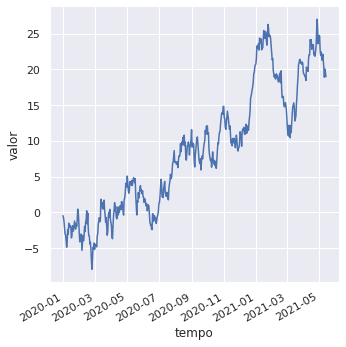

In [27]:
g = sns.relplot(x="tempo", 
                y="valor", 
                kind="line", 
                data=df)
g.figure.autofmt_xdate()

# **Introdução ao Mercado Financeiro**

In [28]:
# Instalando o yahoo finance
!pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 63 kB 6.0 MB/s 
     |████████████████████████████████| 6.4 MB 9.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [29]:
import pandas as pd

In [30]:
import yfinance as yf #Instalando e importando a API no código

In [31]:
import requests

In [32]:
url = "https://investnews.com.br/financas/veja-a-lista-completa-dos-bdrs-disponiveis-para-pessoas-fisicas-na-b3/"
r = requests.get(url)
html = r.text
df_nomes_tickers = pd.read_html(html, header=0)[0]
df_nomes_tickers.head(10)

,EMPRESA,CÓDIGO,SETOR,PAÍS DE ORIGEM
0,3M,MMMC34,Indústria diversificada,EUA
1,AB INBEV,ABUD34,Bebidas,Bélgica
2,ABB LTD,A1BB34,Industrial,Switzerland
3,ABBOTT,ABTT34,Farmacêuticos,EUA
4,ABBVIE,ABBV34,Medicamentos e Outros Produtos,EUA
5,ABIOMED INC,A1BM34,Saúde,EUA
6,ACTIVISION,ATVI34,Tecnologia,EUA
7,ADOBE INC,ADBE34,Tecnologia,EUA
8,ADVANCE AUTO PARTS INC,A1AP34,Peças Automotivas,EUA
9,ADVANCED MIC,A1MD34,Tecnologia,EUA


In [33]:
codigos = df_nomes_tickers['CÓDIGO']
codigo_especifico = codigos[1]
print(codigo_especifico)

ABUD34


In [34]:
codigo_especifico
codigo = [str(codigo_especifico+'.SA')]
codigo

['ABUD34.SA']

In [35]:
df = yf.download(codigo[0], 
                 start='2021-08-01', 
                 end='2021-10-01',
                 group_by="ticker"); # ";" serve para não exibir os dados
             

[*********************100%***********************]  1 of 1 completed


In [36]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-02,54.500000,54.500000,53.950001,53.950001,53.950001,165
2021-08-03,53.950001,54.599998,53.939999,54.250000,54.250000,1289
2021-08-04,54.099998,54.099998,53.290001,53.290001,53.290001,223
2021-08-05,53.150002,53.750000,52.900002,53.650002,53.650002,110
2021-08-06,54.910000,54.910000,53.700001,53.849998,53.849998,567


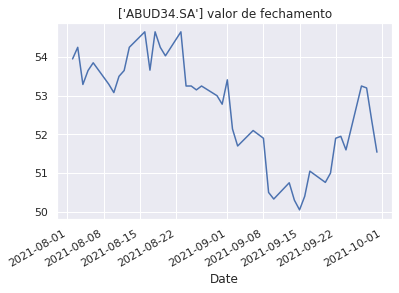

In [37]:
df['Close'].plot(title = str(codigo)+ " valor de fechamento")

**Análise de Várias Ações**

In [38]:
tickers = ['MMMC34.SA', 'ABUD34.SA', 'A1BB34.SA', 'ABTT34.SA', 'ABBV34.SA']

df = yf.download(tickers, 
                 start='2021-08-01', 
                 end='2021-10-01',
                 group_by="ticker"); 

[*********************100%***********************]  5 of 5 completed


In [ ]:
df.head()

ABTT34.SA                          ...   ABBV34.SA                   
                  Open        High         Low  ...       Close   Adj Close Volume
Date                                            ...                               
2021-08-02  155.470001  156.449997  155.350006  ...  599.599976  592.868835     20
2021-08-03  160.490005  161.229996  158.080002  ...  602.760010  595.993408    154
2021-08-04  159.020004  159.020004  158.229996  ...  598.000000  591.286804    311
2021-08-05  155.520004  156.000000  155.520004  ...  591.000000  584.365417      3
2021-08-06  156.000000  160.000000  156.000000  ...  603.000000  596.230713     11

[5 rows x 30 columns]

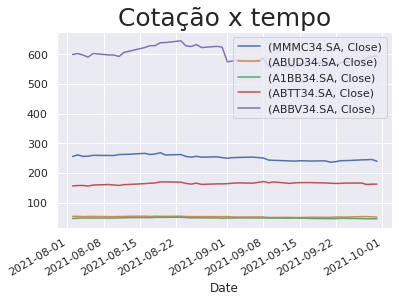

<Figure size 432x288 with 0 Axes>

In [39]:
for acao in tickers:
  serie = df[acao, 'Close']
  serie.plot()

plt.title("Cotação x tempo", fontsize = 25)
# Legendas
#plt.legend(loc='lower left')
#plt.legend(loc=2)
plt.legend(loc='best')
plt.figure();